# Gun Violence Data - Clustering
### K-means Clustering for Gun Violence Data (2013-2018)

#### This script contains following:
1. Import data and libraries
2. Elbow Technique 
3. K-mean clustering
4. Final result analysis

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
#define path
path=r'/Users/yeji/Documents/Career Foundry/Achievement 6/Gun Violence Record Data Analysis'

In [3]:
# Import data
df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'data_with_regions.csv'), index_col = 0)

In [4]:
#check head
df.head()

,incident_id,date,year,month,day,state,city_or_county,n_killed,n_injured,Regions
0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,0,4,Northeast
1,460726,2013-01-01,2013,1,1,California,Hawthorne,1,3,West
2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1,3,Midwest
3,478925,2013-01-05,2013,1,5,Colorado,Aurora,4,0,West
4,478959,2013-01-07,2013,1,7,North Carolina,Greensboro,2,2,South


In [5]:
#check shape
df.shape

(239677, 10)

In [6]:
#remove categorical data
df_int = df[['year','month','day','n_killed','n_injured']]

In [7]:
#remove extreme
df_new= df_int[df_int['n_injured']<50]

In [8]:
#check head of new dataframe
df_new.head()

,year,month,day,n_killed,n_injured
0,2013,1,1,0,4
1,2013,1,1,1,3
2,2013,1,1,1,3
3,2013,1,5,4,0
4,2013,1,7,2,2


### Elbow Technique

In [9]:
#define range of clusters and define kmeans
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [10]:
#create score that represents rate of variation for cluster
score = [kmeans[i].fit(df_new).score(df_new) for i in range(len(kmeans))]
score

[-22092197.295807377,
 -8080634.893905085,
 -5467196.588161858,
 -4561994.108897075,
 -3914554.1371898265,
 -3294530.994404074,
 -2759788.2803232186,
 -2411355.357359439,
 -2173811.879103627]

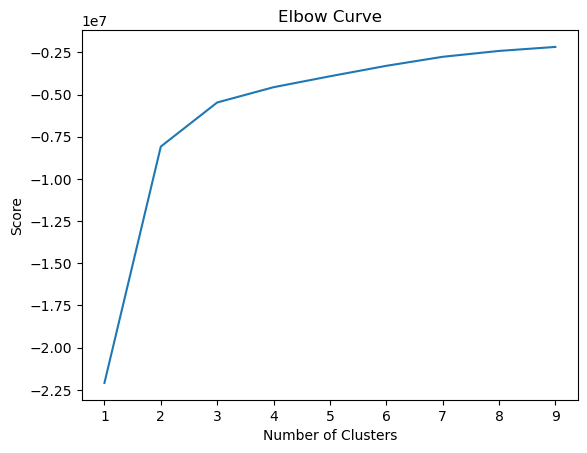

In [11]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Analysis
The curve jumps from 2 to 3 then starts plateau after 3 so the optimal count of cluster is 3. 

### K-means clustering

In [12]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data
kmeans.fit(df_new)

KMeans(n_clusters=3)

In [14]:
#create column in dataframe with cluster assigned
df_new['clusters'] = kmeans.fit_predict(df_new)

/var/folders/7c/wd1dsfj543j4h3klbp_x650w0000gn/T/ipykernel_87349/1569880713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clusters'] = kmeans.fit_predict(df_new)


In [15]:
#check head
df_new.head()

,year,month,day,n_killed,n_injured,clusters
0,2013,1,1,0,4,2
1,2013,1,1,1,3,2
2,2013,1,1,1,3,2
3,2013,1,5,4,0,2
4,2013,1,7,2,2,2


In [16]:
#check number in each cluster
df_new['clusters'].value_counts()

1    82575
0    78910
2    78191
Name: clusters, dtype: int64

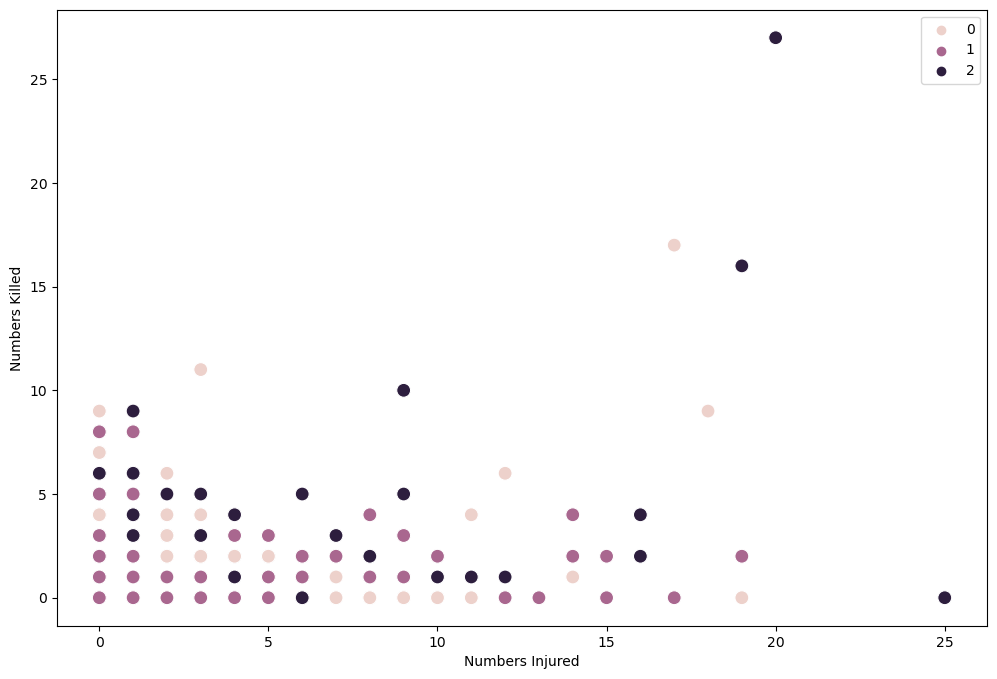

In [17]:
# Plot the clusters for the "injured" and "killed" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['n_injured'], y=df_new['n_killed'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Numbers Injured') 
plt.ylabel('Numbers Killed')
plt.show()

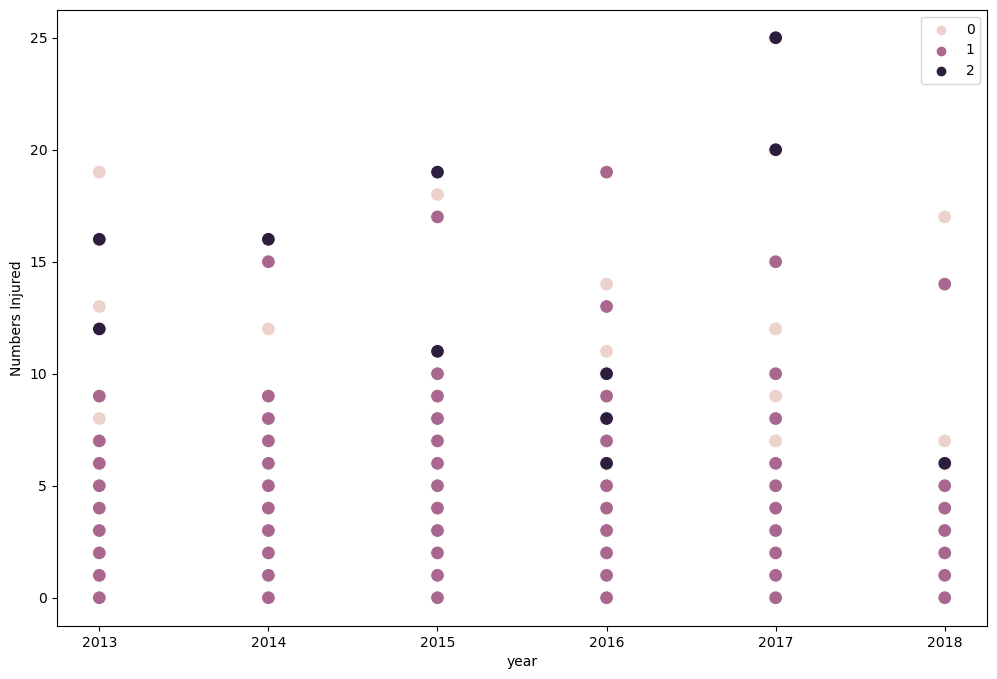

In [18]:
# Plot the clusters for the "year" and "injured" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['year'], y=df_new['n_injured'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('year') 
plt.ylabel('Numbers Injured')
plt.show()

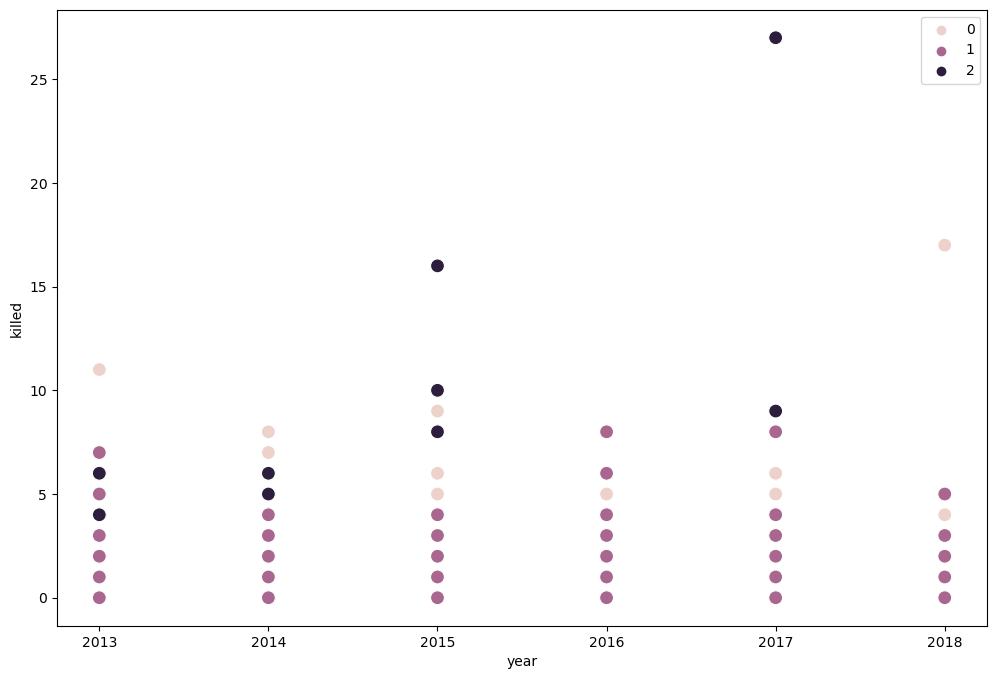

In [19]:
# Plot the clusters for the "year" and "killed" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['year'], y=df_new['n_killed'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('year') 
plt.ylabel('killed')
plt.show()

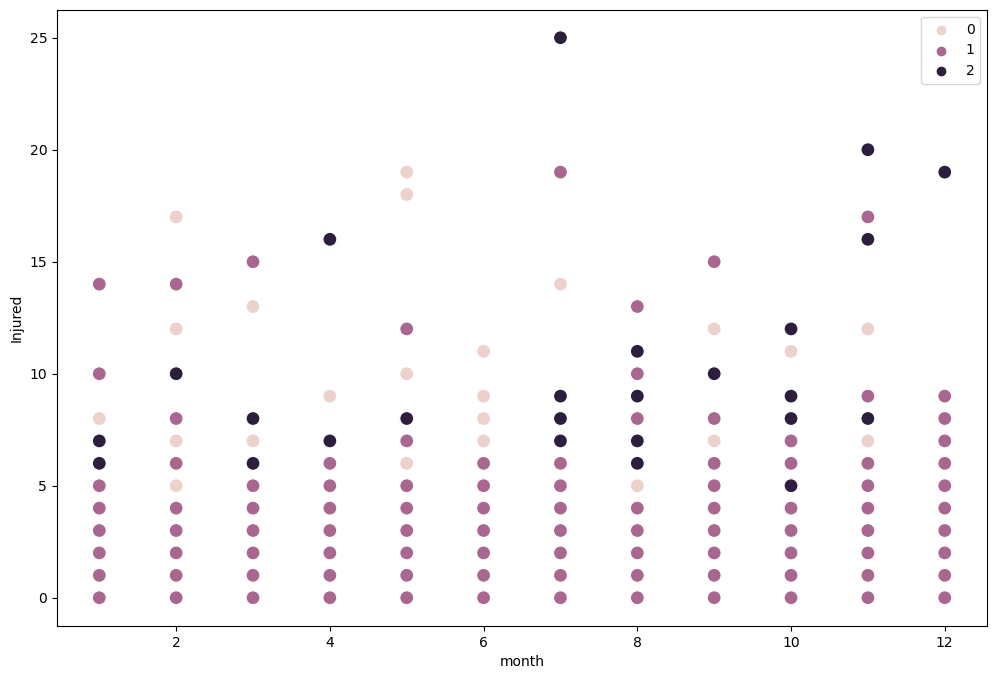

In [20]:
# Plot the clusters for the "month" and "injured" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['month'], y=df_new['n_injured'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('month') 
plt.ylabel('Injured')
plt.show()

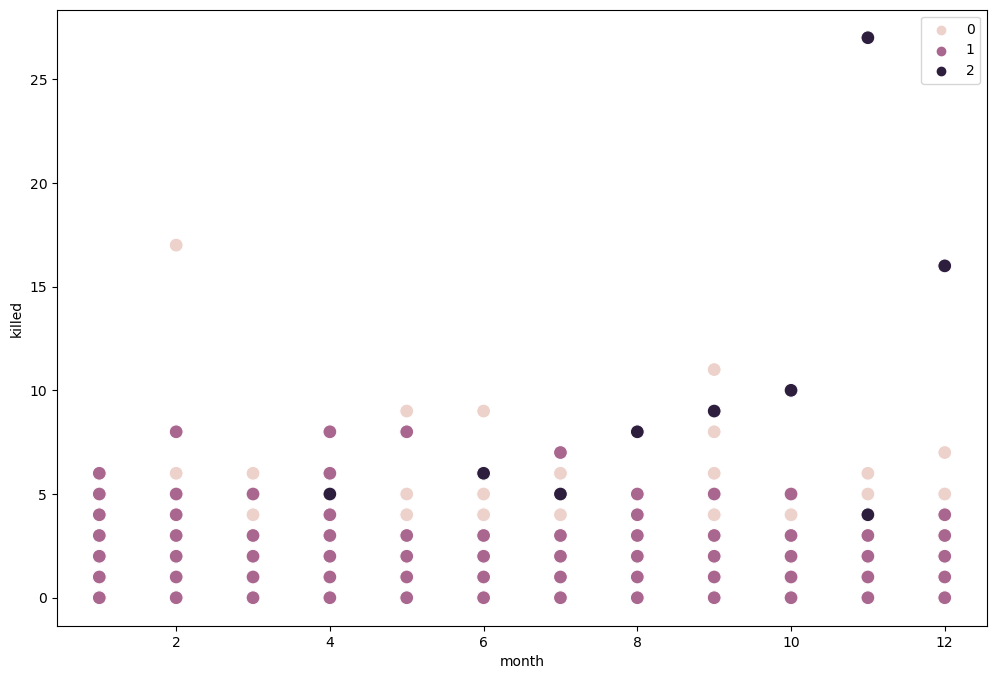

In [21]:
# Plot the clusters for the "month" and "killed" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['month'], y=df_new['n_killed'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('month') 
plt.ylabel('killed')
plt.show()

### Analysis
The first scatterplot with injured and killed shows cluster 1 condensed towards the left corner of the chart and cluster 0 and 2 scattered around cluster 1 but there is no significant pattern that could be seen.
The second and third scatterplot with year&injured and year&killed shows clusters 1 at the lower end of each year and cluster 0 and 2 located at a higher range. Same pattern is seen in the last two scatterplot with month&injured and month&killed.

In [22]:
#adding names for cluster group 
df_new.loc[df_new['clusters'] == 0, 'cluster'] = 'pink'
df_new.loc[df_new['clusters'] == 1, 'cluster'] = 'purple'
df_new.loc[df_new['clusters'] == 2, 'cluster'] = 'black'

/var/folders/7c/wd1dsfj543j4h3klbp_x650w0000gn/T/ipykernel_87349/2627564802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[df_new['clusters'] == 0, 'cluster'] = 'pink'


In [23]:
#descriptive statistics
df_new.groupby('cluster').agg({'year':['mean', 'median'], 
                         'month':['mean', 'median'], 
                         'day':['mean', 'median'],
                          'n_injured':['mean', 'median'],
                         'n_killed':['mean', 'median']})

year             month               day        n_injured  \
                mean  median      mean median       mean median      mean   
cluster                                                                     
black    2015.710696  2016.0  6.352087    6.0   5.446599    5.0  0.490747   
pink     2015.711735  2016.0  6.324610    6.0  15.527614   16.0  0.491484   
purple   2015.712407  2016.0  6.377475    6.0  25.787987   26.0  0.498868   

                n_killed         
        median      mean median  
cluster                          
black      0.0  0.254224    0.0  
pink       0.0  0.249360    0.0  
purple     0.0  0.252655    0.0

### Final Analysis
The descriptive analysis shows:
- All three clusters have similar number for year and month, which means those variables did not impact the clustering
- black cluster has highest mean for numbers killed
- purple cluster has highest mean for numbers injured
- the clusters are most differentiated with days, which might mean that the day variable had most impact on the clustering
